## Installs and Imports

In [1]:
#!pip install open3d

In [2]:
import numpy as np
import open3d as o3d
import sklearn as sk
from sklearn import cluster, datasets, mixture
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os as os

## Helper Functions

In [3]:
# Inputs:
#    cloud: either open3d cloud or numpy array
#    color: array for colors, leave None for default colors
#    mirrorX/mirrorY/mirrorZ: boolean, to mirror the plot alongside the respective axis

def plotCloud(cloud, color = None, mirrorX = False, mirrorY = False, mirrorZ = False):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    points = []
    if(type(cloud) == "numpy.ndarray"): # if cloud is array
        points = cloud
    else: #if cloud is open3d cloud
        points = np.asarray(cloud.points)
        if color == None:
            color = cloud.colors
            
    ax.scatter(points[:,0]*-(mirrorX*2-1),points[:,1]*-(mirrorY*2-1),points[:,2]*-(mirrorZ*2-1), c = color, marker = ".", alpha = 0.2)
    plt.show()

#plotCloud(pcd, mirrorY = True, mirrorZ = True)

In [4]:
def clusterColor(cluster, colors):
    result = []
    for c in cluster:
        if c>=len(colors):
            result.append([0.5,0.5,0.5])
        else:
            result.append(colors[c])
    return result
    

## Load Files

In [16]:
# save original path
try: original_path
except NameError: original_path = os.path.abspath(os.getcwd())

# reset path
os.chdir(original_path)

# change to .ply folder
os.chdir('../data/plyfolder')

# load files
pcds = []

for file in os.listdir():
    if file.split(".")[-1] == "ply":
        pcds.append(o3d.io.read_point_cloud(file))


## Outlier Removal

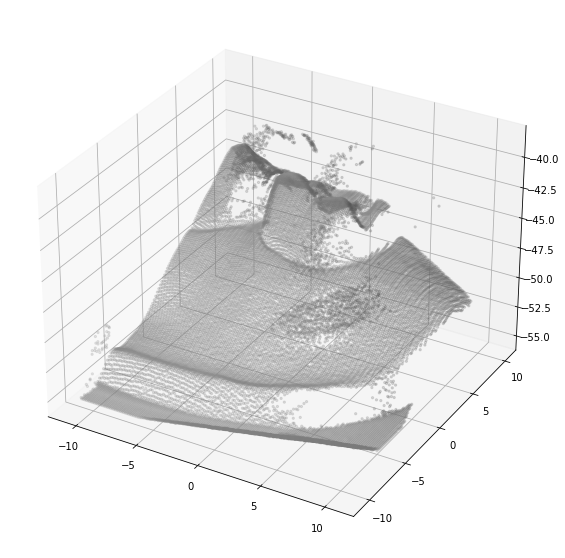

In [19]:
# use voxel filter to filter noise
downpcds = []
for cloud in pcds:
    downpcds.append(cloud.voxel_down_sample(voxel_size=0.1))

#o3d.visualization.draw_geometries([downpcd])
plotCloud(downpcds[0], mirrorY = True, mirrorZ = True)

## Mesh Convertion

In [21]:
alpha = 0.7

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(downpcds[0], alpha)
mesh.compute_vertex_normals()
print(mesh)

TriangleMesh with 21367 points and 51648 triangles.


In [22]:
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

## Clustering

In [24]:
# Colors
cluster_colors = [[0, 0, 1],[0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 0, 1], [1, 0, 0]]

In [30]:
#Agglomerative Clustering
def clusterAgg(X):
    clusteringAgg = cluster.AgglomerativeClustering().fit(X)
    cluster.AgglomerativeClustering()
    return clusteringAgg
    
#clusteringAgg = clusterAgg(np.asarray(downpcds[0].points))

In [36]:
try:
    downpcd.colors = o3d.utility.Vector3dVector(clusterColor(clusteringAgg.labels_, cluster_colors))
    plotCloud(downpcd, mirrorY = True, mirrorZ = True ) 
except:
    print("File not found")

File not found


In [38]:
#DBSCAN
def clusterDBSCAN(X):
    db = cluster.DBSCAN(eps=0.3, min_samples=1).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    print("Number of Clusters: ", max(db.labels_))
    return db

pointcloud 0 :
Number of Clusters:  118


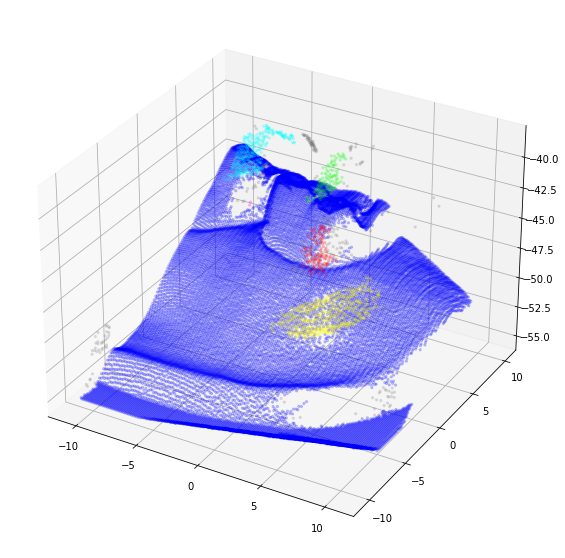

pointcloud 1 :
Number of Clusters:  150


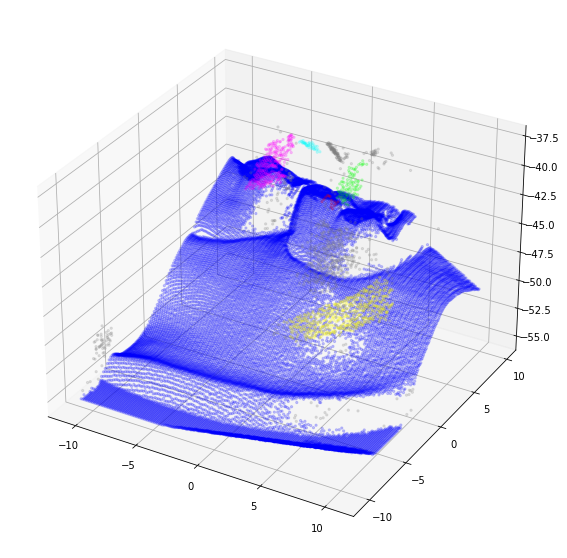

pointcloud 2 :
Number of Clusters:  169


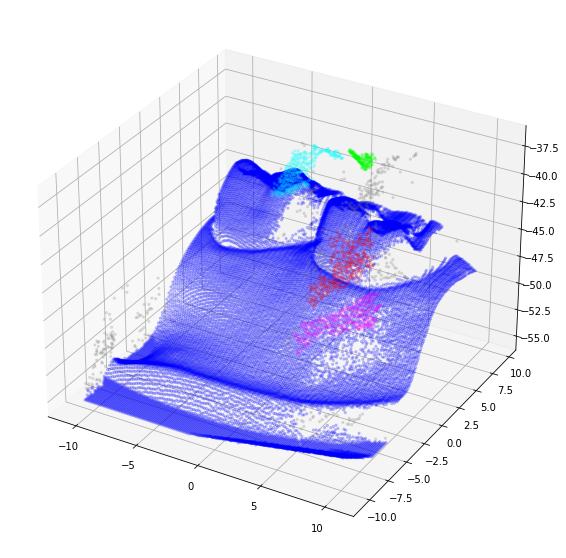

pointcloud 3 :
Number of Clusters:  358


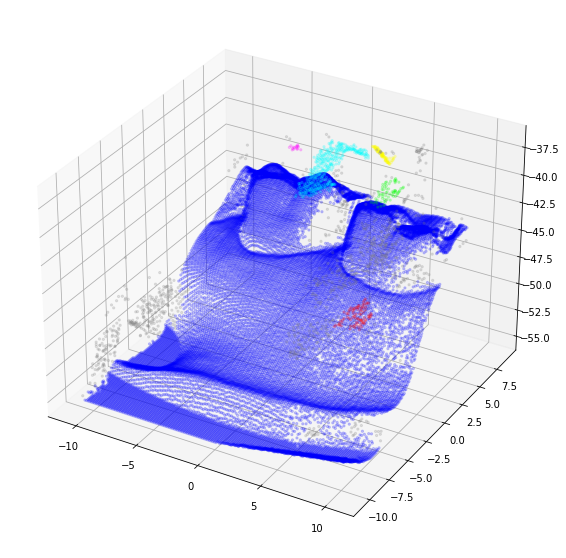

pointcloud 4 :
Number of Clusters:  382


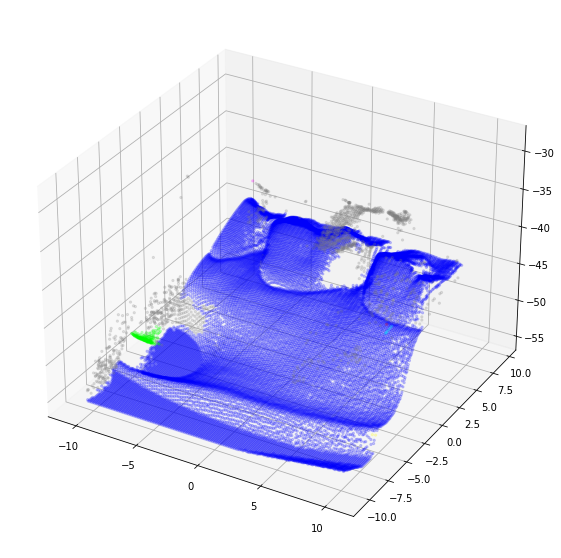

pointcloud 5 :
Number of Clusters:  393


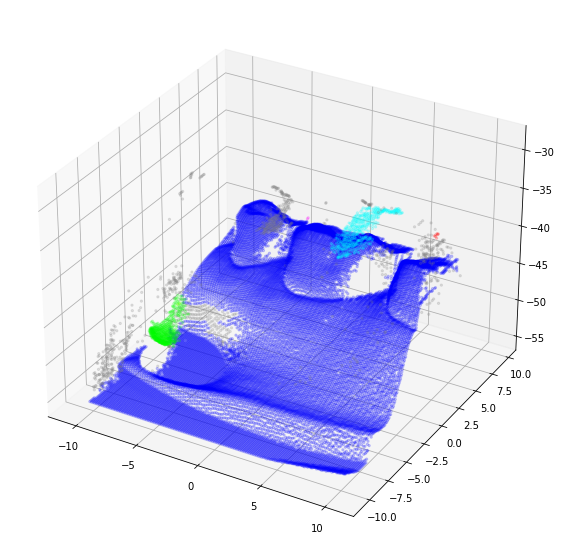

pointcloud 6 :
Number of Clusters:  448


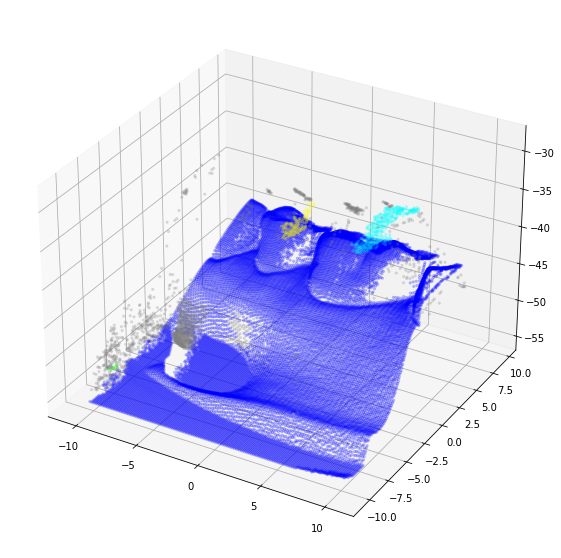

pointcloud 7 :
Number of Clusters:  523


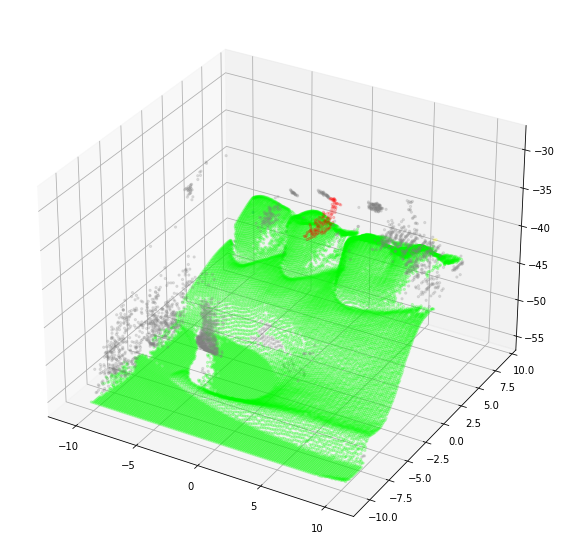

pointcloud 8 :
Number of Clusters:  653


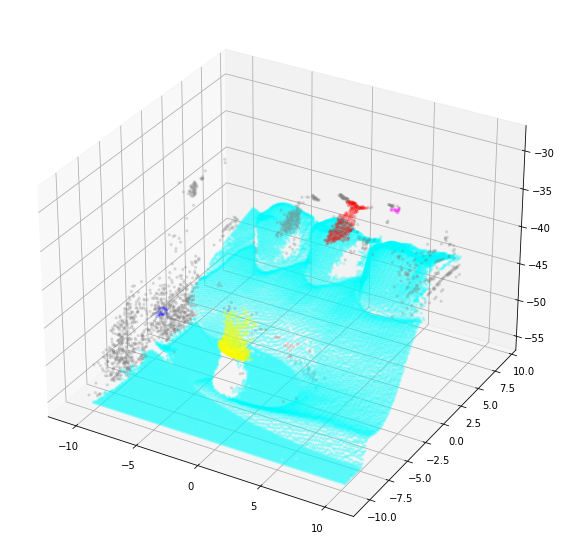

pointcloud 9 :
Number of Clusters:  806


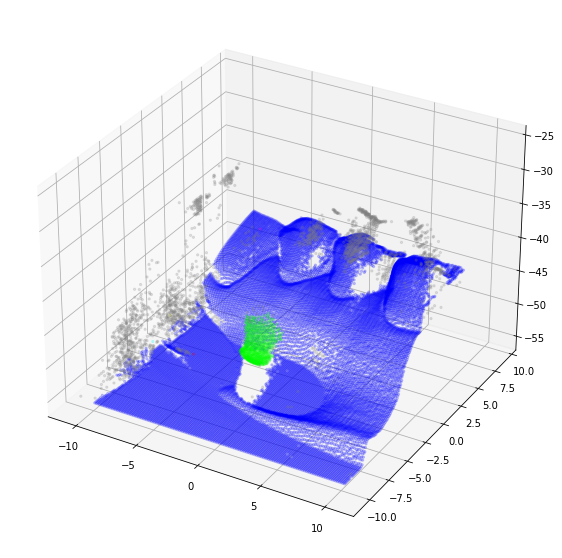

pointcloud 10 :
Number of Clusters:  234


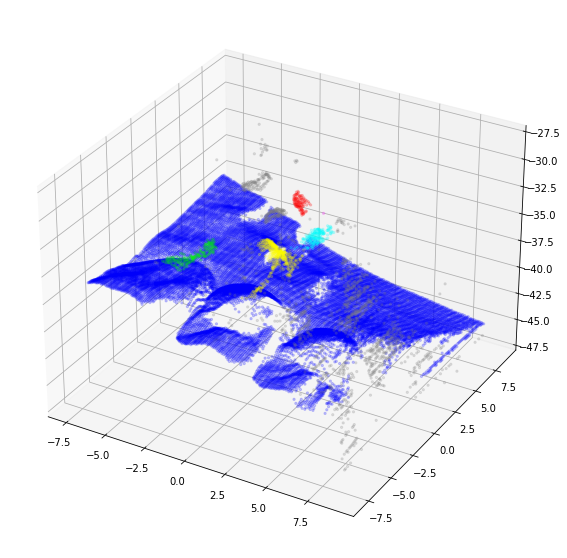

pointcloud 11 :
Number of Clusters:  235


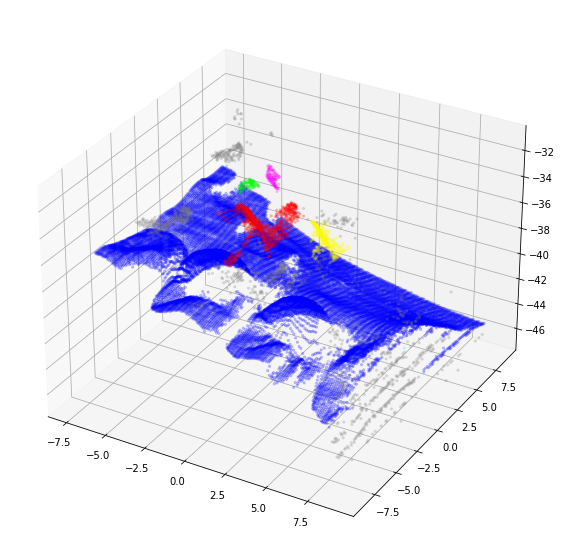

pointcloud 12 :
Number of Clusters:  240


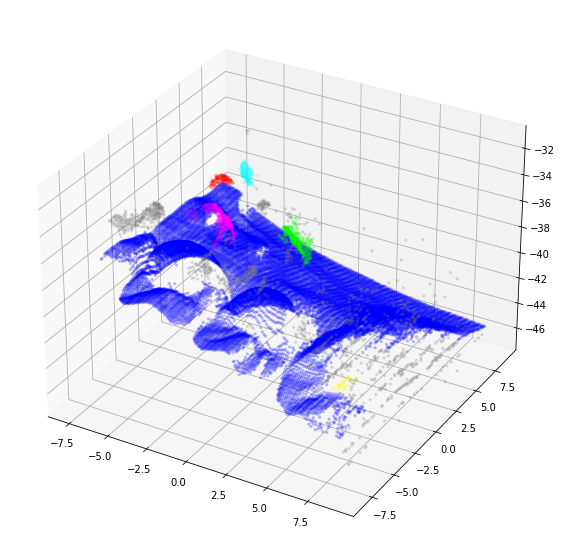

pointcloud 13 :
Number of Clusters:  270


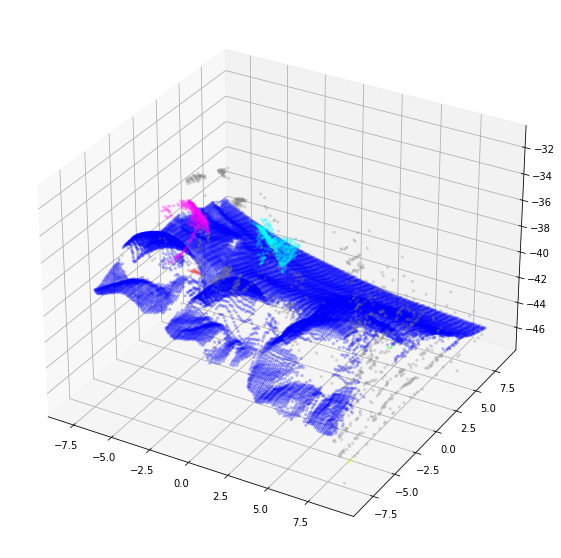

pointcloud 14 :
Number of Clusters:  208


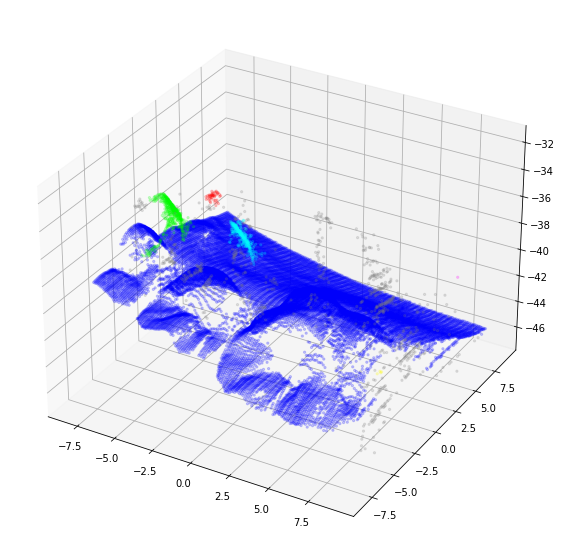

pointcloud 15 :
Number of Clusters:  217


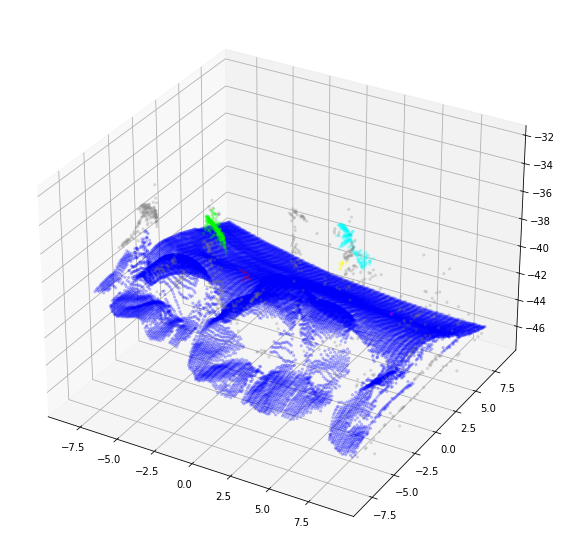

pointcloud 16 :
Number of Clusters:  186


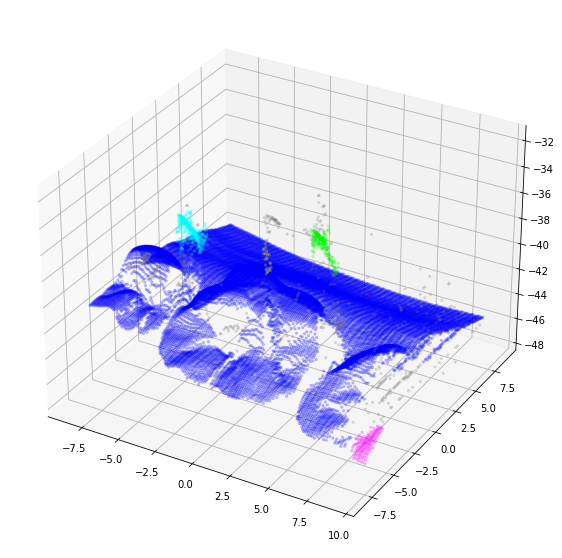

pointcloud 17 :
Number of Clusters:  177


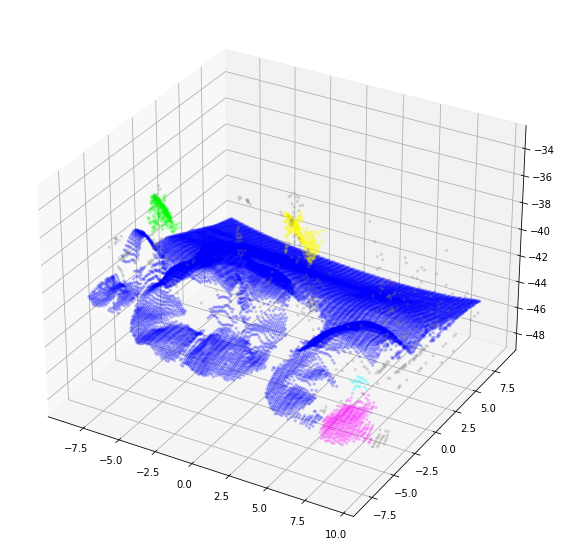

pointcloud 18 :
Number of Clusters:  123


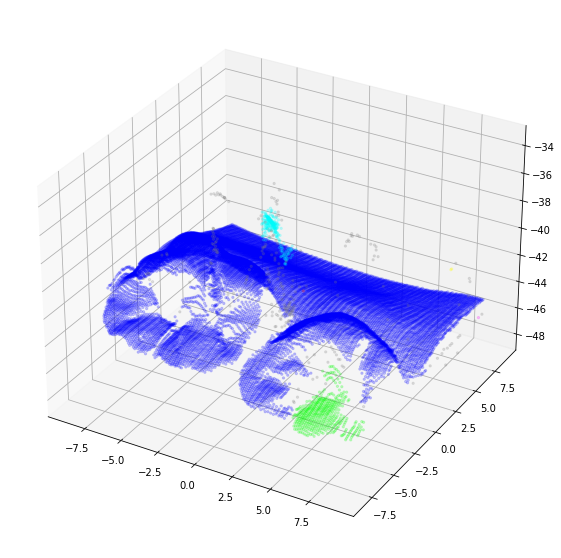

pointcloud 19 :
Number of Clusters:  104


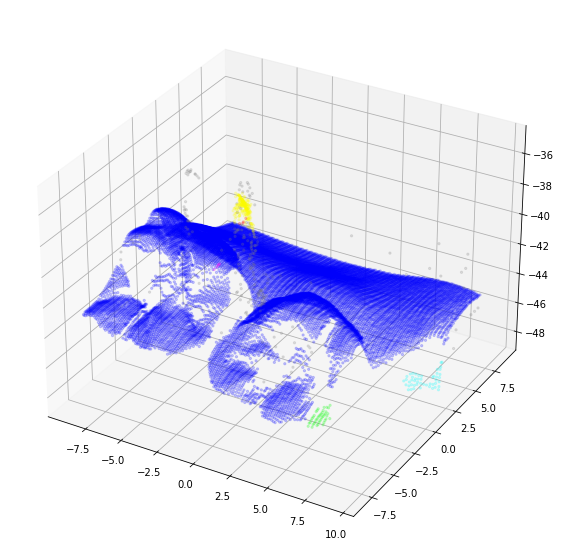

pointcloud 20 :
Number of Clusters:  307


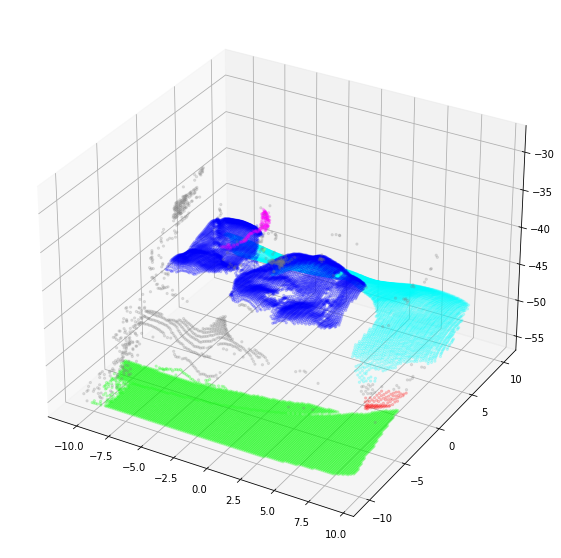

pointcloud 21 :
Number of Clusters:  341


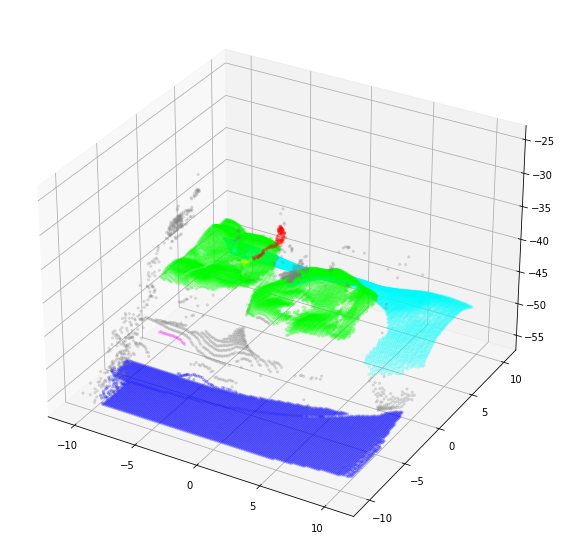

pointcloud 22 :
Number of Clusters:  394


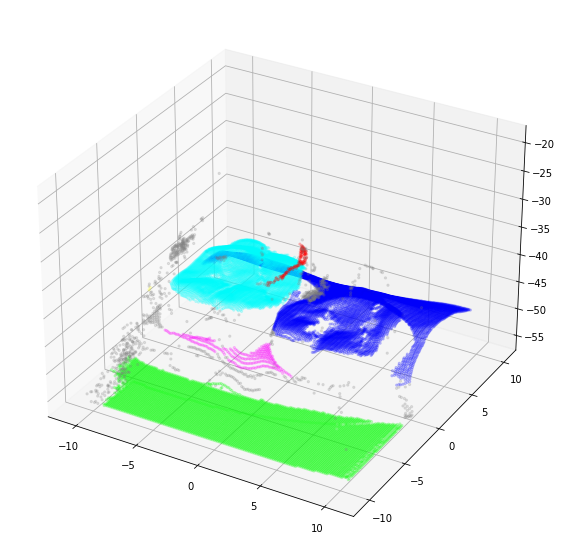

pointcloud 23 :
Number of Clusters:  487


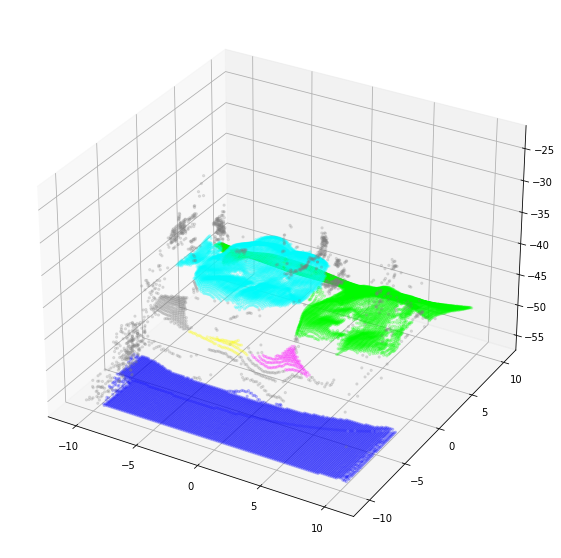

pointcloud 24 :
Number of Clusters:  527


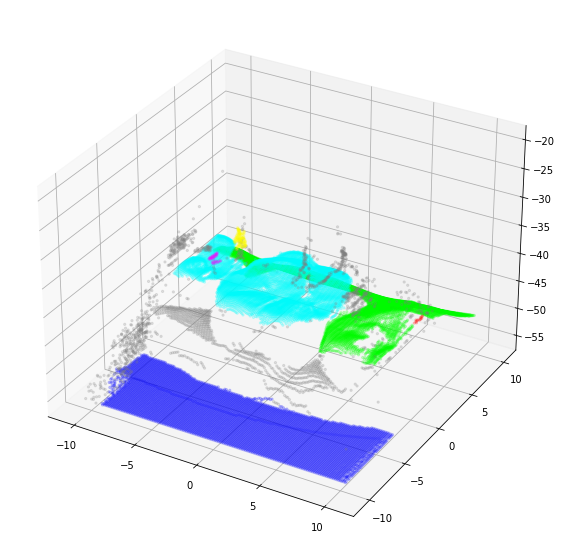

pointcloud 25 :
Number of Clusters:  523


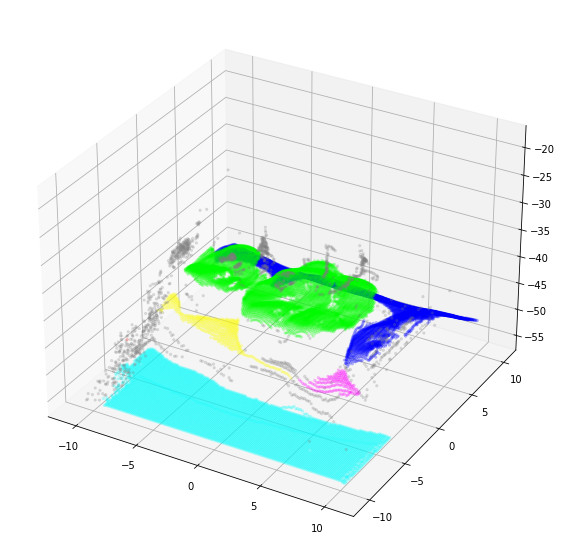

pointcloud 26 :
Number of Clusters:  595


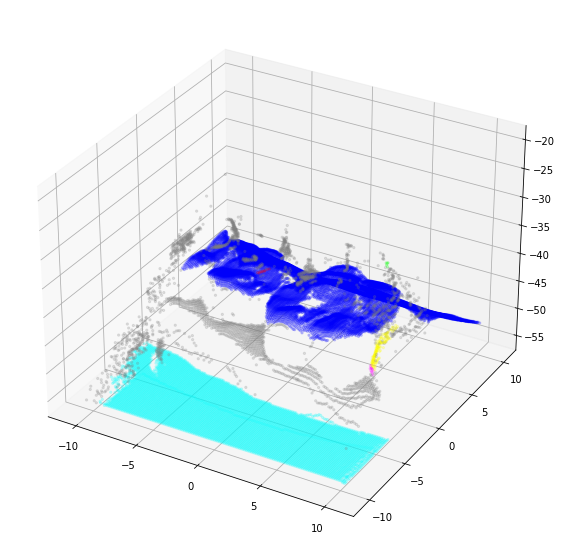

pointcloud 27 :
Number of Clusters:  673


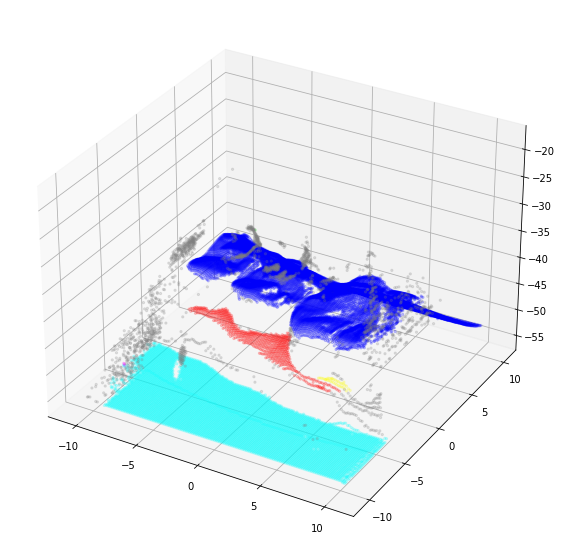

pointcloud 28 :
Number of Clusters:  692


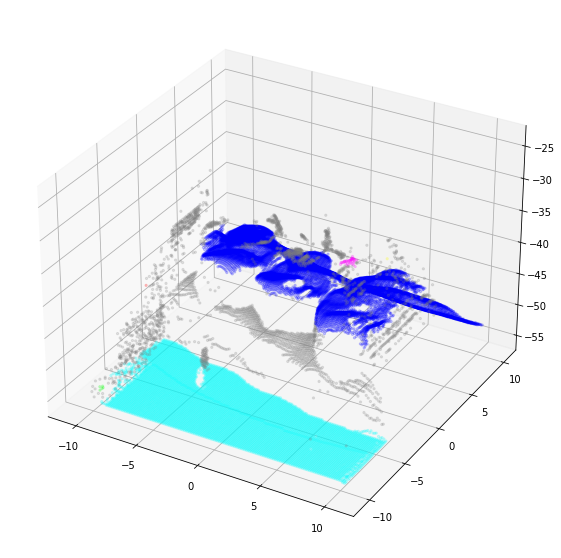

pointcloud 29 :
Number of Clusters:  628


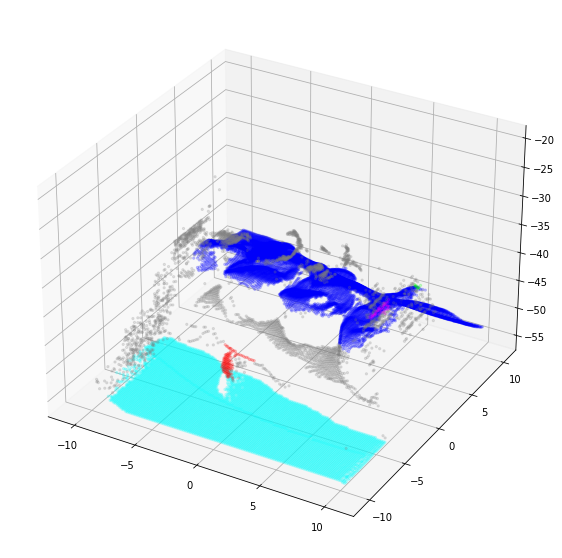

In [42]:
for i in range(len(downpcds)):
    print("pointcloud", i, ":")
    db = clusterDBSCAN(np.asarray(downpcds[i].points))
    downpcds[i].colors = o3d.utility.Vector3dVector(clusterColor(db.labels_, cluster_colors))
    plotCloud(downpcds[i], mirrorY = True, mirrorZ = True )